In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas as pd 
import seaborn as sns
import cv2
import tifffile as tiff

In [15]:
# load IF and H&E images
def load_images(image_path):
    if image_path.endswith('.tif'):
        img = tiff.imread(image_path)
    else:
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

IF_img = load_images("/home/t/tandrew6/btchatch/.$SCRATCH/spatial/Kerfoot_HD_Visium/SC55_image_files/13555_Sec33_SCsCombined_10x_GFAP_B220_Iba1_CD4.png")
H_img = load_images("/home/t/tandrew6/btchatch/.$SCRATCH/spatial/Kerfoot_HD_Visium/SC55_image_files/240606_CytAssist_13555SC.tif")

# load landmarks
landmark_path = "/home/t/tandrew6/btchatch/.$SCRATCH/spatial/Kerfoot_HD_Visium/SC55_image_files/landmarks.csv"
df = pd.read_csv(landmark_path, header=None)
landmarks = df.iloc[:, 2:6].values.astype(float)  # Extract X1, Y1, X2, Y2

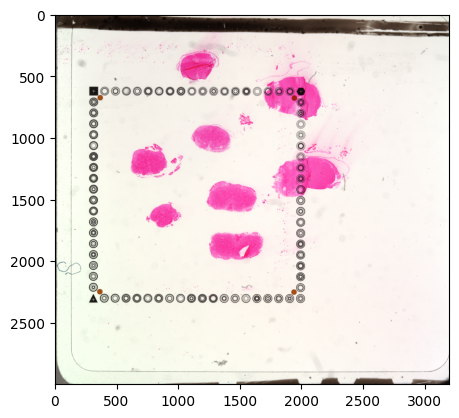

In [14]:
plt.imshow(H_img)

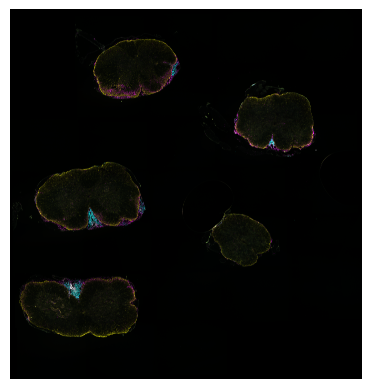

In [10]:
# display the image
plt.imshow(IF_img)
plt.axis('off')
plt.show()


In [18]:
df.head()

,0,1,2,3,4,5
0,Pt-0,True,2055.622083,5042.096282,5913.520129,8646.506748
1,Pt-1,True,1983.403572,5549.372862,6002.692386,9140.850063
2,Pt-2,True,1642.590502,5622.066843,6334.521308,9215.384564
3,Pt-3,True,1386.535582,5569.717838,6669.937211,9172.879966
4,Pt-4,True,1211.982809,5609.503348,6743.894157,9202.678490


In [35]:
#def compute_affine_matrix(src_points, dst_points):
#    """
#    Compute the affine transformation matrix using OpenCV.
#    """
#    # Convert points to the correct format for cv2.estimateAffine2D
#    src_pts = np.float32(src_points)
#    dst_pts = np.float32(dst_points)
#    
#    # Estimate the affine transformation matrix
#    affine_matrix, inliers = cv2.estimateAffine2D(src_pts, dst_pts)
#    return affine_matrix

def compute_affine_matrix(src_points, dst_points):
    """
    Compute the affine transformation matrix using OpenCV.
    """
    # Convert points to the correct format for cv2.getAffineTransform
    src_pts = np.float32(src_points[:3])  # Take first 3 points for affine transformation
    dst_pts = np.float32(dst_points[:3])  # Corresponding points in the target image
    affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)
    return affine_matrix


def apply_affine_transformation(image, matrix):
    """
    Apply the affine transformation matrix to the image.
    """
    # Get the image dimensions
    h, w = image.shape[:2]
    # Apply the transformation matrix
    transformed_image = cv2.warpAffine(image, matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return transformed_image

In [36]:
src_points = landmarks[:, :2]  # Points from source image (X1, Y1)
dst_points = landmarks[:, 2:]  # Points from target image (X2, Y2)

# Compute affine transformation matrix (using all points)
affine_matrix = compute_affine_matrix(src_points, dst_points)
affine_matrix

array([[-9.65462105e-01,  3.83383006e-02,  7.70483983e+03],
       [-1.11806110e-02,  9.72911185e-01,  3.76397817e+03]])

In [37]:
# Apply affine transformation
transformed_img = apply_affine_transformation(IF_img, affine_matrix)

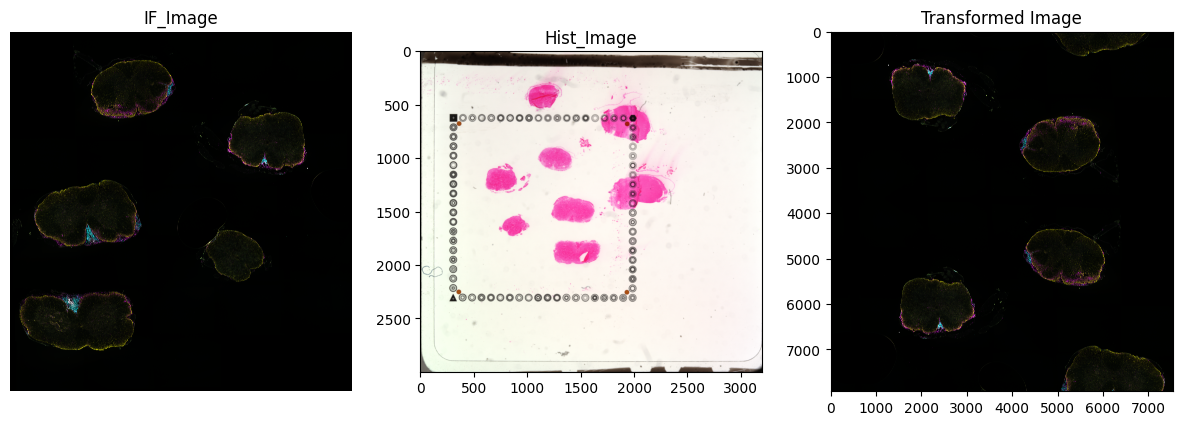

In [40]:
# Display images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('IF_Image')
plt.imshow(IF_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Hist_Image')
plt.imshow(H_img)

plt.subplot(1, 3, 3)
plt.title('Transformed Image')
plt.imshow(transformed_img)
# plt.axis('off')

plt.show()
